# Download Dataset

In [1]:
from keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data()

print(f"#Training samples = {X_train.shape[0]}, #Testing samples = {X_test.shape[0]}.\n")

print(X_train[:10])

17464789/17464789 [==============================] - 0s 0us/step
#Training samples = 25000, #Testing samples = 25000.

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 

In [2]:
print(X_train.shape)

(25000,)


In [3]:
for i in range(10):
  print(f"#Elements in sample {i} are {len(X_train[i])}")

#Elements in sample 0 are 218
#Elements in sample 1 are 189
#Elements in sample 2 are 141
#Elements in sample 3 are 550
#Elements in sample 4 are 147
#Elements in sample 5 are 43
#Elements in sample 6 are 123
#Elements in sample 7 are 562
#Elements in sample 8 are 233
#Elements in sample 9 are 130


In [4]:
print(y_train.shape)
print(y_train[:10])

(25000,)
[1 0 0 1 0 0 1 0 1 0]


# Format Dataset
- Since each sample can have unique number of words, padding is essential.

In [5]:
from keras.preprocessing.sequence import pad_sequences

X_train_padded = pad_sequences(X_train, padding='post', maxlen=100)
X_test_padded = pad_sequences(X_test, padding='post', maxlen=100)

print(f"Shapes of X_train_padded and X_test_padded are = {X_train_padded.shape} and {X_test_padded.shape} respectively.\n")

Shapes of X_train_padded and X_test_padded are = (25000, 100) and (25000, 100) respectively.



In [6]:
X_train_padded[:10]

array([[ 1415,    33,     6,    22,    12,   215,    28,    77,    52,
            5,    14,   407,    16,    82, 10311,     8,     4,   107,
          117,  5952,    15,   256,     4, 31050,     7,  3766,     5,
          723,    36,    71,    43,   530,   476,    26,   400,   317,
           46,     7,     4, 12118,  1029,    13,   104,    88,     4,
          381,    15,   297,    98,    32,  2071,    56,    26,   141,
            6,   194,  7486,    18,     4,   226,    22,    21,   134,
          476,    26,   480,     5,   144,    30,  5535,    18,    51,
           36,    28,   224,    92,    25,   104,     4,   226,    65,
           16,    38,  1334,    88,    12,    16,   283,     5,    16,
         4472,   113,   103,    32,    15,    16,  5345,    19,   178,
           32],
       [  163,    11,  3215, 10156,     4,  1153,     9,   194,   775,
            7,  8255, 11596,   349,  2637,   148,   605, 15358,  8003,
           15,   123,   125,    68, 23141,  6853,    15,   34

# ANN

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
ann = Sequential()

ann.add(Dense(units=200, activation='relu', input_shape=(100,)))
ann.add(Dense(units=300, activation='elu'))
ann.add(Dense(units=150, activation='selu'))
ann.add(Dense(units=100, activation='tanh'))
ann.add(Dense(units=60, activation='elu'))
ann.add(Dense(units=1, activation='sigmoid')) # binary classification

ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               20200     
                                                                 
 dense_1 (Dense)             (None, 300)               60300     
                                                                 
 dense_2 (Dense)             (None, 150)               45150     
                                                                 
 dense_3 (Dense)             (None, 100)               15100     
                                                                 
 dense_4 (Dense)             (None, 60)                6060      
                                                                 
 dense_5 (Dense)             (None, 1)                 61        
                                                                 
Total params: 146871 (573.71 KB)
Trainable params: 14687

In [9]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ann_history = ann.fit(X_train_padded, y_train, batch_size=32, epochs=100, validation_split=(0.2))

Epoch 1/100
625/625 [==============================] - 12s 8ms/step - loss: 0.7071 - accuracy: 0.5030 - val_loss: 0.6957 - val_accuracy: 0.4960
Epoch 2/100
625/625 [==============================] - 5s 8ms/step - loss: 0.6987 - accuracy: 0.4997 - val_loss: 0.6949 - val_accuracy: 0.4950
Epoch 3/100
625/625 [==============================] - 4s 7ms/step - loss: 0.6987 - accuracy: 0.5016 - val_loss: 0.6986 - val_accuracy: 0.4938
Epoch 4/100
625/625 [==============================] - 4s 6ms/step - loss: 0.6970 - accuracy: 0.4965 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 5/100
625/625 [==============================] - 3s 5ms/step - loss: 0.6966 - accuracy: 0.5033 - val_loss: 0.6933 - val_accuracy: 0.5062
Epoch 6/100
625/625 [==============================] - 3s 5ms/step - loss: 0.6953 - accuracy: 0.4970 - val_loss: 0.6932 - val_accuracy: 0.4942
Epoch 7/100
625/625 [==============================] - 2s 4ms/step - loss: 0.6960 - accuracy: 0.4994 - val_loss: 0.6983 - val_accuracy: 0.506

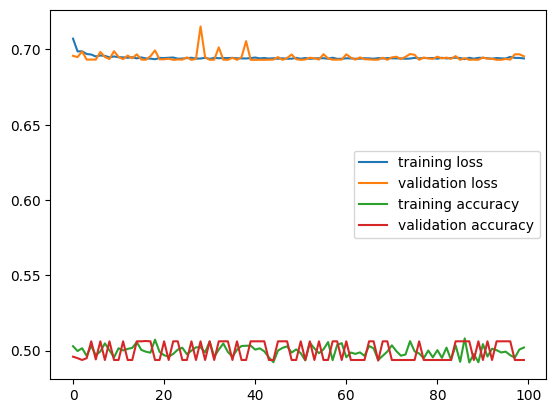

In [10]:
import matplotlib.pyplot as plt

plt.plot(range(len(ann_history.history['loss'])), ann_history.history['loss'], label='training loss')
plt.plot(range(len(ann_history.history['loss'])), ann_history.history['val_loss'], label='validation loss')
plt.plot(range(len(ann_history.history['loss'])), ann_history.history['accuracy'], label='training accuracy')
plt.plot(range(len(ann_history.history['loss'])), ann_history.history['val_accuracy'], label='validation accuracy')

plt.legend()
plt.show()

In [11]:
import numpy as np

y_pred = ann.predict(X_test_padded)
y_pred = np.where(y_pred >= 0.5, 1, 0)
y_pred[:10]

782/782 [==============================] - 1s 2ms/step


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [12]:
from sklearn.metrics import accuracy_score

print(f"Accuracy for test set is {accuracy_score(y_test, y_pred)}")

Accuracy for test set is 0.5


## Problem
- a problem that could've occurred is that the integer encoding could cause some *features* to blow up in value, against others that have smaller integer-value on being encoded.
- hence we might need to normalize across each feature.

## ANN with normalized integer-encoded words.
- normalize for each of the 100 words, across each sample.

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_padded_scaled = scaler.fit_transform(X_train_padded)
X_test_padded_scaled = scaler.transform(X_test_padded)

In [14]:
ann_normalized = Sequential()

ann_normalized.add(Dense(units=200, activation='relu', input_shape=(100,)))
ann_normalized.add(Dense(units=300, activation='elu'))
ann_normalized.add(Dense(units=150, activation='selu'))
ann_normalized.add(Dense(units=100, activation='tanh'))
ann_normalized.add(Dense(units=60, activation='elu'))
ann_normalized.add(Dense(units=1, activation='sigmoid')) # binary classification

ann_normalized.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 200)               20200     
                                                                 
 dense_7 (Dense)             (None, 300)               60300     
                                                                 
 dense_8 (Dense)             (None, 150)               45150     
                                                                 
 dense_9 (Dense)             (None, 100)               15100     
                                                                 
 dense_10 (Dense)            (None, 60)                6060      
                                                                 
 dense_11 (Dense)            (None, 1)                 61        
                                                                 
Total params: 146871 (573.71 KB)
Trainable params: 146

In [15]:
from keras.callbacks import EarlyStopping, Callback

class OverfitDetector(Callback):

  def __init__(self, patience=0):
    super(OverfitDetector, self).__init__()
    self.patience = patience
    self.wait = 0
    self.best_train_loss = float('inf')
    self.best_val_loss = float('inf')

  def on_epoch_end(self, epoch, logs=None):
    current_val_loss = logs.get('val_loss')
    current_train_loss = logs.get('loss')

    self.best_train_loss = min(self.best_train_loss, current_train_loss)

    if current_val_loss < self.best_val_loss:
      # validation loss gone down, improvement in model observed in this epoch
      self.best_val_loss = current_val_loss
      self.wait = 0
    else:
      # validation loss stayed same/gone higher
      # possible overfitting
      self.wait += 1
      if self.wait >= self.patience:
          print(f"\nEpoch {epoch + 1}: Overfitting detected! Stopping training.")
          self.model.stop_training = True

ann_normalized.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# es = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
es = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)
overfit_ = OverfitDetector(patience=8)

ann_normalized_history = ann_normalized.fit(X_train_padded_scaled, y_train, batch_size=32, epochs=100, validation_split=(0.2), callbacks=[es, overfit_])

Epoch 1/100
625/625 [==============================] - 5s 4ms/step - loss: 0.7029 - accuracy: 0.4983 - val_loss: 0.6975 - val_accuracy: 0.4966
Epoch 2/100
625/625 [==============================] - 3s 5ms/step - loss: 0.6938 - accuracy: 0.5191 - val_loss: 0.6962 - val_accuracy: 0.5086
Epoch 3/100
625/625 [==============================] - 4s 6ms/step - loss: 0.6890 - accuracy: 0.5437 - val_loss: 0.6928 - val_accuracy: 0.5238
Epoch 4/100
625/625 [==============================] - 5s 8ms/step - loss: 0.6854 - accuracy: 0.5533 - val_loss: 0.6991 - val_accuracy: 0.5128
Epoch 5/100
625/625 [==============================] - 4s 7ms/step - loss: 0.6803 - accuracy: 0.5613 - val_loss: 0.6953 - val_accuracy: 0.5216
Epoch 6/100
625/625 [==============================] - 4s 7ms/step - loss: 0.6694 - accuracy: 0.5870 - val_loss: 0.7032 - val_accuracy: 0.5264
Epoch 7/100
625/625 [==============================] - 3s 5ms/step - loss: 0.6536 - accuracy: 0.6072 - val_loss: 0.7272 - val_accuracy: 0.5158

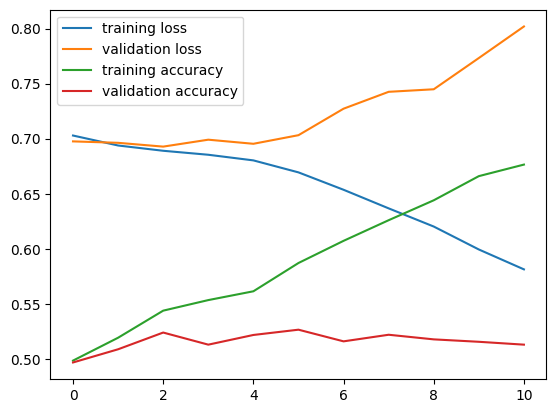

In [16]:
import matplotlib.pyplot as plt

plt.plot(range(len(ann_normalized_history.history['loss'])), ann_normalized_history.history['loss'], label='training loss')
plt.plot(range(len(ann_normalized_history.history['loss'])), ann_normalized_history.history['val_loss'], label='validation loss')
plt.plot(range(len(ann_normalized_history.history['loss'])), ann_normalized_history.history['accuracy'], label='training accuracy')
plt.plot(range(len(ann_normalized_history.history['loss'])), ann_normalized_history.history['val_accuracy'], label='validation accuracy')

plt.legend()
plt.show()

In [17]:
import numpy as np

y_pred = ann_normalized.predict(X_test_padded_scaled)
y_pred = np.where(y_pred >= 0.5, 1, 0)
y_pred[:10]

from sklearn.metrics import accuracy_score

print(f"Accuracy for test set is {accuracy_score(y_test, y_pred)}")

782/782 [==============================] - 2s 2ms/step
Accuracy for test set is 0.51136


# RNN (with padding)

In [47]:
from keras.models import Sequential
from keras.layers import SimpleRNN

rnn = Sequential()
rnn.add(SimpleRNN(units=80, input_shape=(100,1)))
rnn.add(Dense(units=1, activation='sigmoid'))

print(rnn.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, 80)                6560      
                                                                 
 dense_18 (Dense)            (None, 1)                 81        
                                                                 
Total params: 6641 (25.94 KB)
Trainable params: 6641 (25.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [48]:
from keras.callbacks import EarlyStopping, Callback

class OverfitDetector(Callback):

  def __init__(self, patience=0):
    super(OverfitDetector, self).__init__()
    self.patience = patience
    self.wait = 0
    self.best_train_loss = float('inf')
    self.best_val_loss = float('inf')

  def on_epoch_end(self, epoch, logs=None):
    current_val_loss = logs.get('val_loss')
    current_train_loss = logs.get('loss')

    self.best_train_loss = min(self.best_train_loss, current_train_loss)

    if current_val_loss < self.best_val_loss:
      # validation loss gone down, improvement in model observed in this epoch
      self.best_val_loss = current_val_loss
      self.wait = 0
    else:
      # validation loss stayed same/gone higher
      # possible overfitting
      self.wait += 1
      if self.wait >= self.patience:
          print(f"\nEpoch {epoch + 1}: Overfitting detected! Stopping training.")
          self.model.stop_training = True

ann_normalized.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# es = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
es = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)
overfit_ = OverfitDetector(patience=8)

In [49]:
rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_history = rnn.fit(X_train_padded, y_train, epochs=100, batch_size=32, callbacks=[es, overfit_], validation_split=0.2)

Epoch 1/100
625/625 [==============================] - 21s 32ms/step - loss: 0.6962 - accuracy: 0.5044 - val_loss: 0.6925 - val_accuracy: 0.5176
Epoch 2/100
625/625 [==============================] - 22s 35ms/step - loss: 0.6944 - accuracy: 0.5098 - val_loss: 0.6922 - val_accuracy: 0.5164
Epoch 3/100
625/625 [==============================] - 25s 41ms/step - loss: 0.6955 - accuracy: 0.5058 - val_loss: 0.6912 - val_accuracy: 0.5074
Epoch 4/100
625/625 [==============================] - 22s 34ms/step - loss: 0.6948 - accuracy: 0.5039 - val_loss: 0.6930 - val_accuracy: 0.5002
Epoch 5/100
625/625 [==============================] - 22s 36ms/step - loss: 0.6947 - accuracy: 0.5058 - val_loss: 0.6975 - val_accuracy: 0.5006
Epoch 6/100
625/625 [==============================] - 15s 24ms/step - loss: 0.6933 - accuracy: 0.5104 - val_loss: 0.6937 - val_accuracy: 0.5194
Epoch 7/100
625/625 [==============================] - 15s 24ms/step - loss: 0.6943 - accuracy: 0.5058 - val_loss: 0.6902 - val_ac

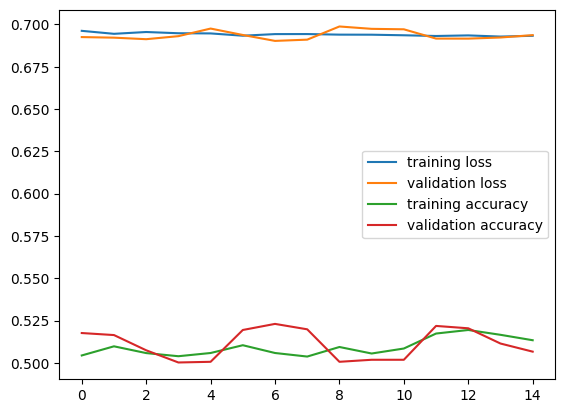

In [50]:
import matplotlib.pyplot as plt

plt.plot(range(len(rnn_history.history['loss'])), rnn_history.history['loss'], label='training loss')
plt.plot(range(len(rnn_history.history['loss'])), rnn_history.history['val_loss'], label='validation loss')
plt.plot(range(len(rnn_history.history['loss'])), rnn_history.history['accuracy'], label='training accuracy')
plt.plot(range(len(rnn_history.history['loss'])), rnn_history.history['val_accuracy'], label='validation accuracy')

plt.legend()
plt.show()

In [51]:
import numpy as np

y_pred = rnn.predict(X_test_padded_scaled)
y_pred = np.where(y_pred >= 0.5, 1, 0)

from sklearn.metrics import accuracy_score

print(f"Accuracy for test set is {accuracy_score(y_test, y_pred)}")

782/782 [==============================] - 7s 8ms/step
Accuracy for test set is 0.49984


# RNN (without padding)

In [77]:
from keras.models import Sequential
from keras.layers import SimpleRNN

rnn_without_padding = Sequential()
rnn_without_padding.add(SimpleRNN(units=2))
rnn_without_padding.add(Dense(units=1, activation='sigmoid'))

# print(rnn_without_padding.summary())

In [78]:
from keras.callbacks import EarlyStopping, Callback

class OverfitDetector(Callback):

  def __init__(self, patience=0):
    super(OverfitDetector, self).__init__()
    self.patience = patience
    self.wait = 0
    self.best_train_loss = float('inf')
    self.best_val_loss = float('inf')

  def on_epoch_end(self, epoch, logs=None):
    current_val_loss = logs.get('val_loss')
    current_train_loss = logs.get('loss')

    self.best_train_loss = min(self.best_train_loss, current_train_loss)

    if current_val_loss < self.best_val_loss:
      # validation loss gone down, improvement in model observed in this epoch
      self.best_val_loss = current_val_loss
      self.wait = 0
    else:
      # validation loss stayed same/gone higher
      # possible overfitting
      self.wait += 1
      if self.wait >= self.patience:
          print(f"\nEpoch {epoch + 1}: Overfitting detected! Stopping training.")
          self.model.stop_training = True

ann_normalized.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# es = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
es = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)
overfit_ = OverfitDetector(patience=8)

In [79]:
import tensorflow as tf
X_train_tensor = tf.ragged.constant(X_train, dtype=tf.int32)

# Split the data into training and validation sets
split_index = int(len(X_train) * 0.8)

train_sequences, val_sequences = X_train_tensor[:split_index], X_train_tensor[split_index:]
train_labels, val_labels = y_train[:split_index], y_train[split_index:]

In [80]:
rnn_without_padding.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_without_padding_history = rnn_without_padding.fit(train_sequences, train_labels, epochs=100, batch_size=32)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_16' (type Sequential).
    
    Input 0 of layer "simple_rnn_14" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, None)
    
    Call arguments received by layer 'sequential_16' (type Sequential):
      • inputs=tf.RaggedTensor(values=Tensor("RaggedFromVariant/RaggedTensorFromVariant:1", shape=(None,), dtype=int32), row_splits=Tensor("RaggedFromVariant/RaggedTensorFromVariant:0", shape=(None,), dtype=int64))
      • training=True
      • mask=None


In [71]:
rnn_without_padding.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_without_padding_history = rnn_without_padding.fit(train_sequences, train_labels, epochs=100, batch_size=32, callbacks=[es, overfit_], validation_data=(val_sequences, val_labels))

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_14' (type Sequential).
    
    Input 0 of layer "simple_rnn_12" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, None)
    
    Call arguments received by layer 'sequential_14' (type Sequential):
      • inputs=tf.RaggedTensor(values=Tensor("RaggedFromVariant/RaggedTensorFromVariant:1", shape=(None,), dtype=int32), row_splits=Tensor("RaggedFromVariant/RaggedTensorFromVariant:0", shape=(None,), dtype=int64))
      • training=True
      • mask=None


In [66]:
rnn_without_padding.layers[0].input.ndim

AttributeError: 'KerasTensor' object has no attribute 'ndim'

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(len(rnn_without_padding_history.history['loss'])), rnn_without_padding_history.history['loss'], label='training loss')
plt.plot(range(len(rnn_without_padding_history.history['loss'])), rnn_without_padding_history.history['val_loss'], label='validation loss')
plt.plot(range(len(rnn_without_padding_history.history['loss'])), rnn_without_padding_history.history['accuracy'], label='training accuracy')
plt.plot(range(len(rnn_without_padding_history.history['loss'])), rnn_without_padding_history.history['val_accuracy'], label='validation accuracy')

plt.legend()
plt.show()

In [ ]:
import numpy as np

y_pred = rnn_without_padding.predict(X_test_padded_scaled)
y_pred = np.where(y_pred >= 0.5, 1, 0)

from sklearn.metrics import accuracy_score

print(f"Accuracy for test set is {accuracy_score(y_test, y_pred)}")

# Compare Performances

# Vector embedding

## ANN

## RNN

# Compare performances
- of all 4 types of networks
  - ANN with integer encoding
  - RNN with integer encoding
  - ANN with vector embeddings
  - RNN with vector embeddings